In [1]:
# 載入所需函示庫
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels
import math
import statistics
import statsmodels.stats.outliers_influence as sso
from matplotlib import pyplot as plt
from statsmodels.tsa.api import Holt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150

In [2]:
df108 = pd.read_csv("108.csv")
df109 = pd.read_csv("109.csv")
df110 = pd.read_csv("110.csv")
df108 = df108.dropna()
df109 = df109.dropna()
df110 = df110.dropna()

In [3]:
display(df108.tail())
display(df109.tail())
display(df110.tail())

,日期,翡翠水庫日平均水位/公尺,水庫有效蓄水量/百萬立方公尺,集水區平均雨量/毫米,水庫進流量/立方公尺,水庫放流量/立方公尺,進流量減放流量/立方公尺,南勢溪流量/立方公尺,南北勢溪合計原水量/立方公尺
360,12月27日,166.98,307.530,3.1,"855,940","1,742,940","-887,000","1,409,760","3,152,700"
361,12月28日,166.90,306.643,0.7,"700,700","1,586,700","-886,000","1,346,400","2,933,100"
362,12月29日,166.77,305.816,14.3,"832,740","1,186,740","-354,000","1,440,360","2,627,100"
363,12月30日,166.74,305.569,19.1,"1,129,728","1,306,728","-177,000","1,550,520","2,857,248"
364,12月31日,166.82,306.319,17.1,"2,393,000",0,"2,393,000","2,192,400","2,192,400"


,日期,翡翠水庫日平均水位/公尺,水庫有效蓄水量/百萬立方公尺,集水區平均雨量/毫米,水庫進流量/立方公尺,水庫放流量/立方公尺,進流量減放流量/立方公尺,南勢溪流量/立方公尺,南北勢溪合計原水量/立方公尺
361,12月27日,168.44,320.737,1.1,"2,568,852","2,118,852","450,000","3,963,600","6,082,452"
362,12月28日,168.46,320.868,2.2,"1,949,832","2,129,832","-180,000","3,466,800","5,596,632"
363,12月29日,168.32,319.622,0.4,"1,730,160","3,260,160","-1,530,000","3,146,400","6,406,560"
364,12月30日,168.16,318.161,10.6,"1,869,816","3,216,816","-1,347,000","2,921,040","6,137,856"
365,12月31日,168.11,317.802,0.0,"988,000",0,"988,000","2,761,200","2,761,200"


,日期,翡翠水庫日平均水位/公尺,水庫有效蓄水量/百萬立方公尺,集水區平均雨量/毫米,水庫進流量/立方公尺,水庫放流量/立方公尺,進流量減放流量/立方公尺,南勢溪流量/立方公尺,南北勢溪合計原水量/立方公尺
360,12月27日,168.07,317.416,13.6,"4,729,660","4,101,660","628,000","2,787,480","6,889,140"
361,12月28日,168.15,318.109,1.1,"3,473,152","2,575,152","898,000","2,765,520","5,340,672"
362,12月29日,168.22,318.749,0.4,"2,310,048","2,130,048","180,000","2,468,160","4,598,208"
363,12月30日,168.20,318.502,0.2,"1,857,808","2,396,808","-539,000","2,243,520","4,640,328"
364,12月31日,168.16,318.232,1.4,"1,244,456","615,456","629,000","2,050,560","2,666,016"


In [4]:
df1000 = pd.concat([df108, df109, df110])
display(df1000)
print(df1000.shape[0])

,日期,翡翠水庫日平均水位/公尺,水庫有效蓄水量/百萬立方公尺,集水區平均雨量/毫米,水庫進流量/立方公尺,水庫放流量/立方公尺,進流量減放流量/立方公尺,南勢溪流量/立方公尺,南北勢溪合計原水量/立方公尺
0,1月1日,167.64,313.631,18.9,"7,543,380","3,796,380","3,747,000","6,307,200","10,103,580"
1,1月2日,167.76,314.587,16.8,"6,572,620","6,661,620","-89,000","6,316,200","12,977,820"
2,1月3日,167.77,314.699,18.4,"7,019,088","6,662,088","357,000","6,793,200","13,455,288"
3,1月4日,167.84,315.378,6.7,"7,374,848","6,658,848","716,000","6,391,800","13,050,648"
4,1月5日,167.75,314.506,1.0,"4,338,772","6,662,772","-2,324,000","5,221,800","11,884,572"
...,...,...,...,...,...,...,...,...,...
360,12月27日,168.07,317.416,13.6,"4,729,660","4,101,660","628,000","2,787,480","6,889,140"
361,12月28日,168.15,318.109,1.1,"3,473,152","2,575,152","898,000","2,765,520","5,340,672"
362,12月29日,168.22,318.749,0.4,"2,310,048","2,130,048","180,000","2,468,160","4,598,208"
363,12月30日,168.20,318.502,0.2,"1,857,808","2,396,808","-539,000","2,243,520","4,640,328"


1096


In [5]:
display(df1000["水庫進流量/立方公尺"])

0      7,543,380
1      6,572,620
2      7,019,088
3      7,374,848
4      4,338,772
         ...    
360    4,729,660
361    3,473,152
362    2,310,048
363    1,857,808
364    1,244,456
Name: 水庫進流量/立方公尺, Length: 1096, dtype: object

In [6]:
arr = []
for i in df1000['水庫進流量/立方公尺']:
    arr.append(i)

for i in range(df1000.shape[0]):
    arr[i] = arr[i].replace(",", "")
    arr[i] = int(arr[i])
#arr

In [7]:
df_a = np.zeros(df1000.shape[0])
df_a[:] = np.nan
mvlen = 365
halfwin = int((mvlen - 1) / 2)
for i in range(halfwin, df1000.shape[0] - halfwin):
    df_a[i] = np.mean(arr[(i - halfwin): (i + halfwin + 1)])
print(df_a)

[nan nan nan ... nan nan nan]


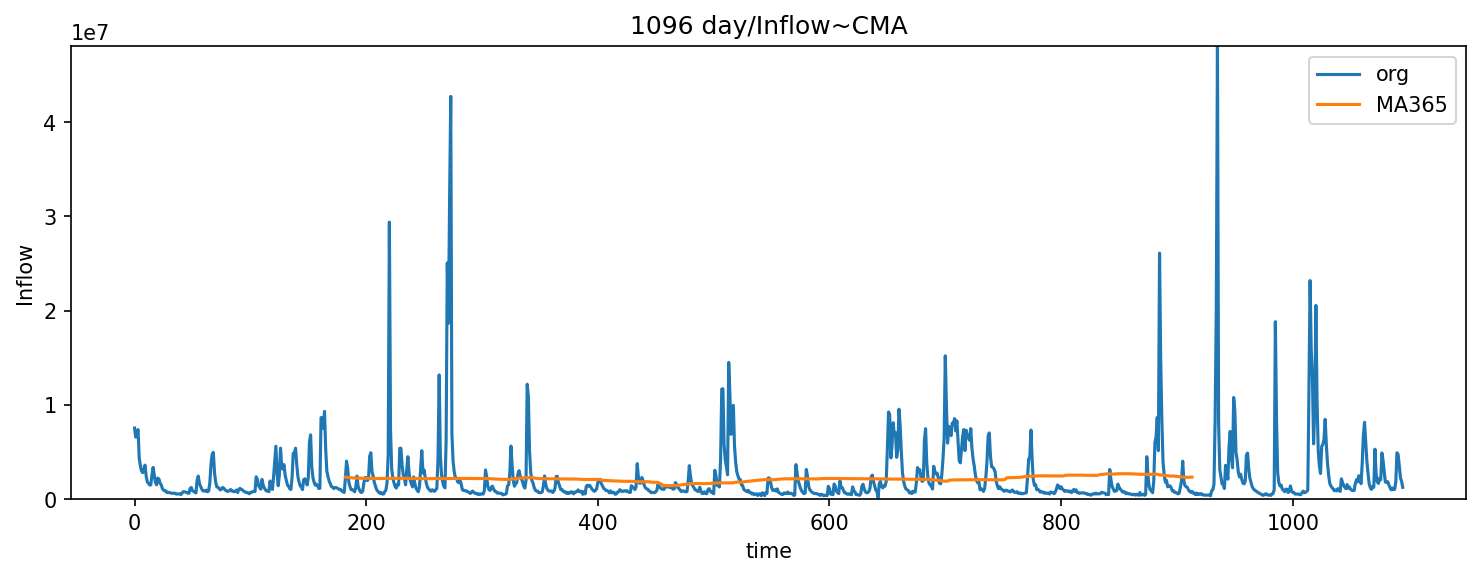

In [8]:
fig = plt.figure(figsize = (12,4))
df = pd.DataFrame({'orig': arr, 'ma365_smooth': df_a})
n = df1000.shape[0]
t = range(0, n)
plt.plot(t, arr)
plt.plot(t, df_a)
plt.ylim(0, max(arr) + 5)
plt.legend(labels = ['org', 'MA365'])
plt.xlabel("time")
plt.ylabel("Inflow")
plt.title("1096 day/Inflow~CMA")
plt.show()

In [9]:
def SI_MA(y_v, n):
    y_v_MA_a = np.zeros(len(y_v))
    y_v_MA_a[:] = np.nan
    mvlen = n
    if n % 2 == 0:
        halfwin = int(mvlen / 2)
        y_v_MA_ta = np.zeros(len(y_v))
        for i in range(halfwin, len(y_v) - halfwin + 1):
            y_v_MA_ta[i] = np.mean(y_v[(i - halfwin) : (i + halfwin)])
        for ii in range(halfwin, len(y_v) - halfwin):
            y_v_MA_a[ii] = np.mean(y_v_MA_ta[(ii):(ii+2)])
    else:
        halfwin = int((mvlen - 1) / 2)
        for i in range(halfwin, len(y_v) - halfwin):
            y_v_MA_a[i] = np.mean(y_v[(i - halfwin) : (i + halfwin + 1)])
    SI_MA_a = np.zeros(len(y_v))
    SI_MA_a[:] = np.nan
    SI_MA_a = y_v / y_v_MA_a
    SI_id_s = np.arange(1, len(y_v) + 1)
    SI_id = SI_id_s - np.floor(SI_id_s / n) * n
    SI_id[np.where((SI_id[:] == 0))] = n
    SI_MA_a_df = pd.DataFrame({'SIMA': SI_MA_a, 'SI_id': SI_id})
    SI_MA_u = np.zeros(n)
    for j in range(1, n + 1):
        SI_MA_u[j-1] = SI_MA_a_df['SIMA'][SI_MA_a_df['SI_id'] == j].dropna().mean()
    SI_MA = SI_MA_u / sum(SI_MA_u) * n
    print("Seasonal Index:", SI_MA)
    y_v_SI_MA = np.zeros(len(y_v))
    DSI_y_v = np.zeros(len(y_v))
    for k in range(0, len(y_v)):
        Idd = int(SI_MA_a_df['SI_id'][k] - 1)
        y_v_SI_MA[k] = SI_MA[Idd]
        DSI_y_v[k] = y_v[k] / SI_MA[Idd]
    print("Deseasonalized data:", DSI_y_v)
    SI_MA_result_a = np.array([SI_MA_a_df['SI_id'], y_v_SI_MA, y_v, DSI_y_v])
    SI_MA_result_df = pd.DataFrame(SI_MA_result_a.T, columns = ['SID', 'SeaIdx', 'orig', 'Des D'])
    return {'ma_ind': SI_MA, 'SI_MA_res': SI_MA_result_df}

Seasonal Index: [ 0.79837332  0.66740441  0.55955236  0.43139549  0.52054735  0.75498033
  1.13808496  1.79518378  1.84830626  1.2709641   0.97536228  0.97702572
  0.96227843  0.87791827  0.57864361  0.5147205   0.4426782   0.51054203
  0.49980097  0.43684971  0.40122521  0.39482039  0.34358445  0.39387369
  0.31563007  0.50748141  0.5174416   0.51699484  0.55908772  0.47285714
  0.40551895  0.37728254  0.36614191  0.35046989  0.39156764  0.56187505
  0.58845753  0.62367618  0.53150862  0.48578224  0.4264954   0.73706
  1.09899435  1.15713765  1.71867591  1.02187358  0.63987756  0.46893428
  0.49169183  0.38420416  0.33828359  0.33308298  0.34263122  0.35975856
  0.4161099   0.36227975  0.35264508  0.34499252  0.35933402  0.35254764
  0.34568387  0.35206572  0.33826511  0.31719075  0.49278937  0.49237012
  0.53403751  0.57607079  0.61549736  1.23646328  0.90142793  0.67563809
  0.65228477  0.78121881  0.71103227  0.56618597  0.49887542  0.44593559
  0.45286407  0.37335761  0.39528741  

,SID,SeaIdx,orig,Des D
0,1.0,0.798373,7543380.0,9.448437e+06
1,2.0,0.667404,6572620.0,9.848032e+06
2,3.0,0.559552,7019088.0,1.254411e+07
3,4.0,0.431395,7374848.0,1.709533e+07
4,5.0,0.520547,4338772.0,8.335019e+06
...,...,...,...,...
1091,362.0,0.781582,4729660.0,6.051392e+06
1092,363.0,0.662519,3473152.0,5.242341e+06
1093,364.0,0.678330,2310048.0,3.405493e+06
1094,365.0,1.004735,1857808.0,1.849052e+06


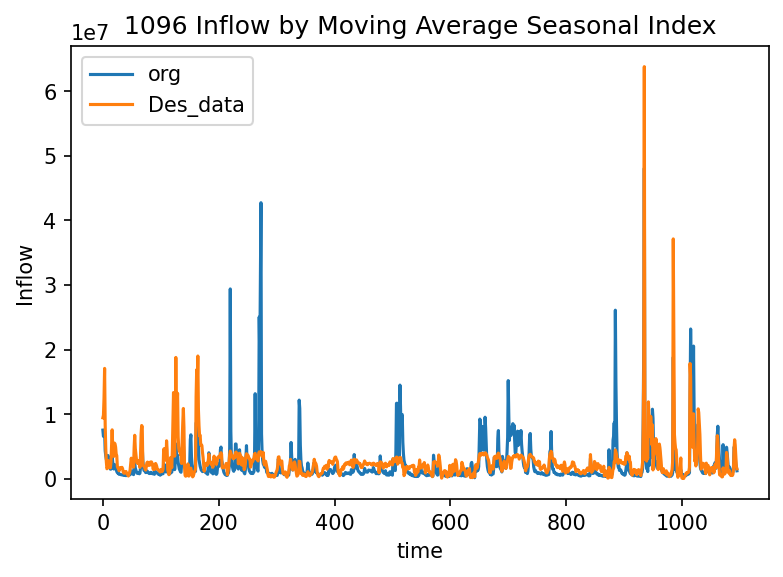

In [10]:
df1000_result = pd.DataFrame(columns = ['ma_ind', 'SI_MA_res'])
df1000_result = SI_MA(arr, 365)
df1000_Idx = df1000_result["ma_ind"]
print(df1000_Idx)
df1000_Result = df1000_result['SI_MA_res']
display(df1000_Result)
plt.plot(t, df1000_Result['orig'])
plt.plot(t, df1000_Result['Des D'])
plt.legend(labels = ['org', 'Des_data'])
plt.xlabel("time")
plt.ylabel("Inflow")
plt.title("1096 Inflow by Moving Average Seasonal Index")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Des D   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8249
Date:                Thu, 19 May 2022   Prob (F-statistic):              0.364
Time:                        20:00:45   Log-Likelihood:                -17932.
No. Observations:                1096   AIC:                         3.587e+04
Df Residuals:                    1094   BIC:                         3.588e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.73e+06   1.86e+05     14.645      0.0

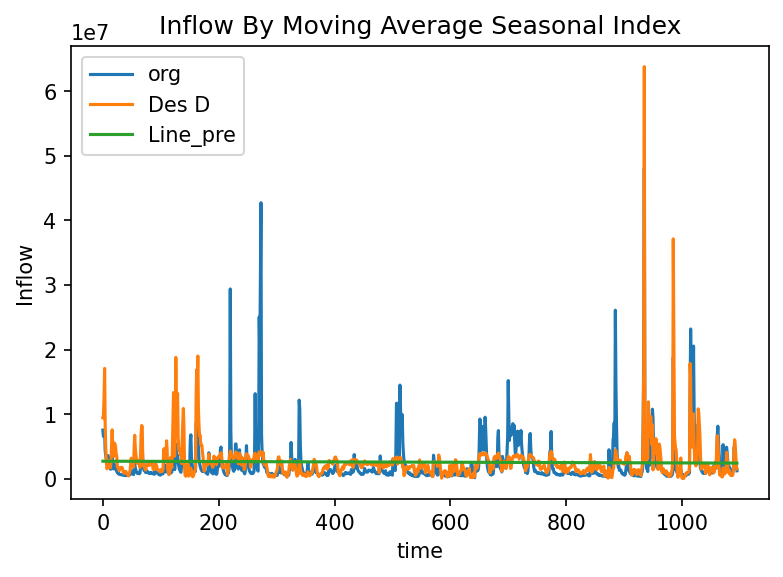

In [11]:
y_data_df = df1000_Result['Des D']
X_data_ar = np.array([t])
X_data_ar_T = X_data_ar.T
X_data_df = pd.DataFrame(X_data_ar_T, columns = ['t'])
X_data_df = sm.add_constant(X_data_df)
olsmod_df_MA = sm.OLS(y_data_df, X_data_df)
result_reg = olsmod_df_MA.fit()
print(result_reg.summary())
df1000_st, df1000_MA_data, df1000_MA_ss2 = sso.summary_table(result_reg, alpha = 0.05)
df1000_y_pre = df1000_MA_data[:, 2]
print(df1000_y_pre)
plt.plot(t, df1000_Result['orig'])
plt.plot(t, df1000_Result['Des D'])
plt.plot(t, df1000_y_pre)
plt.legend(labels = ['org', 'Des D', 'Line_pre'])
plt.xlabel('time')
plt.ylabel('Inflow')
plt.title('Inflow By Moving Average Seasonal Index')
plt.show()

In [12]:
pre_MA = df1000_y_pre * df1000_Result['SeaIdx']
New_t = range(n, n + 365)
Total_t = np.append(t, New_t)
New_t = sm.add_constant(New_t)
pre_new_t = result_reg.predict(New_t)
print("New Des Prediction:", pre_new_t)
sea_pre_new_t = pre_new_t * df1000_Idx
print("New Prediction:", sea_pre_new_t)
New_Nan = np.zeros(New_t.shape[0])
New_Nan[:] = np.nan
new_orig = np.append(df1000_Result['orig'], New_Nan)
new_Des_D = np.append(df1000_Result['Des D'], New_Nan)
new_des_pre = np.append(df1000_y_pre, pre_new_t)
new_sea_pre = np.append(pre_MA, sea_pre_new_t)
new_a = np.array([Total_t, new_orig, new_Des_D, new_des_pre, new_sea_pre])
new_df = pd.DataFrame(new_a.T, columns = ['time', 'org', 'Des_data', 'Line pre', 'Seasonal pre'])
display(new_df)

New Des Prediction: [2436767.30805971 2436499.53612663 2436231.76419355 2435963.99226047
 2435696.2203274  2435428.44839432 2435160.67646124 2434892.90452817
 2434625.13259509 2434357.36066201 2434089.58872894 2433821.81679586
 2433554.04486278 2433286.27292971 2433018.50099663 2432750.72906355
 2432482.95713047 2432215.1851974  2431947.41326432 2431679.64133124
 2431411.86939817 2431144.09746509 2430876.32553201 2430608.55359894
 2430340.78166586 2430073.00973278 2429805.23779971 2429537.46586663
 2429269.69393355 2429001.92200048 2428734.1500674  2428466.37813432
 2428198.60620124 2427930.83426817 2427663.06233509 2427395.29040201
 2427127.51846894 2426859.74653586 2426591.97460278 2426324.20266971
 2426056.43073663 2425788.65880355 2425520.88687048 2425253.1149374
 2424985.34300432 2424717.57107124 2424449.79913817 2424182.02720509
 2423914.25527201 2423646.48333894 2423378.71140586 2423110.93947278
 2422843.16753971 2422575.39560663 2422307.62367355 2422039.85174048
 2421772.079807

,time,org,Des_data,Line pre,Seasonal pre
0,0.0,7543380.0,9.448437e+06,2.730245e+06,2.179755e+06
1,1.0,6572620.0,9.848032e+06,2.729978e+06,1.821999e+06
2,2.0,7019088.0,1.254411e+07,2.729710e+06,1.527416e+06
3,3.0,7374848.0,1.709533e+07,2.729442e+06,1.177469e+06
4,4.0,4338772.0,8.335019e+06,2.729174e+06,1.420664e+06
...,...,...,...,...,...
1456,1456.0,NaN,NaN,2.340369e+06,2.444691e+06
1457,1457.0,NaN,NaN,2.340102e+06,1.828982e+06
1458,1458.0,NaN,NaN,2.339834e+06,1.550185e+06
1459,1459.0,NaN,NaN,2.339566e+06,1.586998e+06


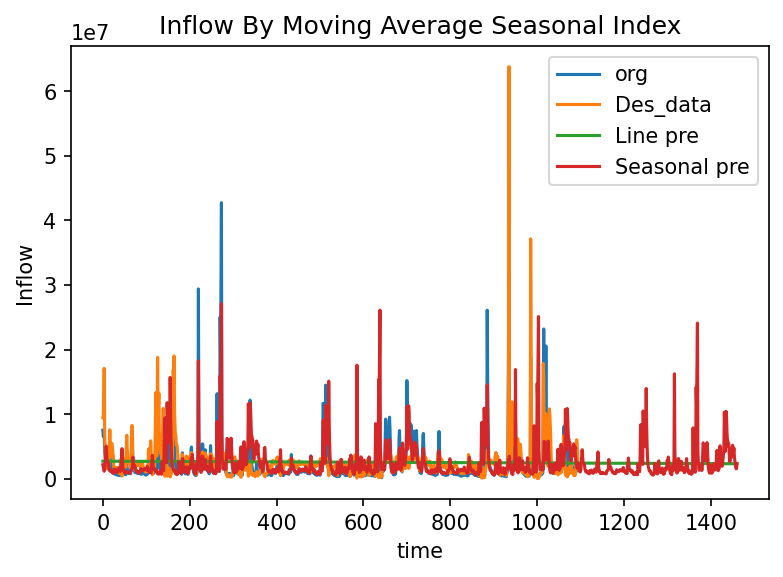

In [13]:
plt.plot(Total_t, new_orig)
plt.plot(Total_t, new_Des_D)
plt.plot(Total_t, new_des_pre)
plt.plot(Total_t, new_sea_pre)
plt.legend(labels = ['org', 'Des_data', 'Line pre', 'Seasonal pre'])
plt.xlabel("time")
plt.ylabel("Inflow")
plt.title("Inflow By Moving Average Seasonal Index")
plt.show()

In [14]:
# studentized residual
st1, data1, ss3 = sso.summary_table(result_reg, alpha=0.05)
SD = data1[:, 10]
mu = np.mean(SD)
sigma = np.std(SD)
print(SD)
print('mu = ', mu)
print('sigma = ', sigma)

[ 2.1795511   2.30926514  3.18400852 ...  0.31401536 -0.19084252
 -0.28494129]
mu =  6.964149749943971e-05
sigma =  1.0002994522729005


H0: Errors are normally distributed.  
H1: Errors are not normally distributed.

In [15]:
print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Shapiro Test
Statistics=0.454, p=0.000


H0: Homoscedasticity  
H1: Heteroscedasticity

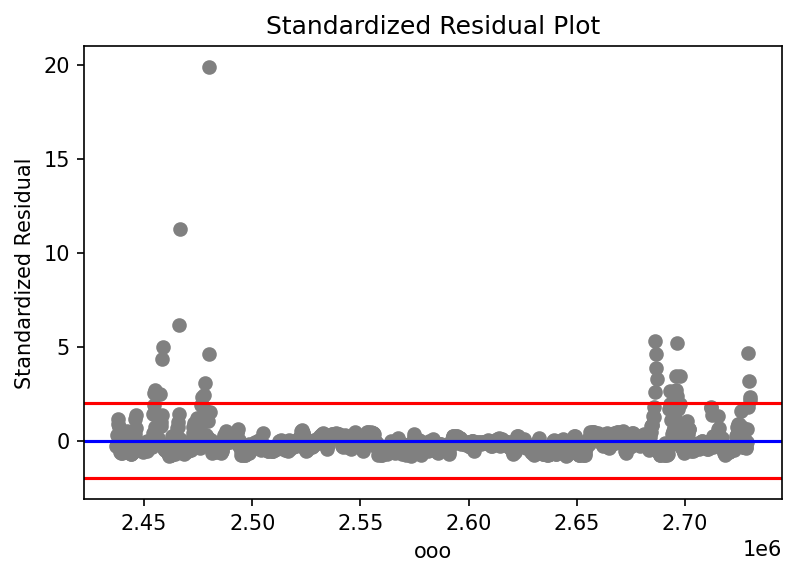

In [16]:
y_pre = data1[:, 2]
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('ooo')
plt.ylabel('Standardized Residual')
plt.show()

H0 : Randomness exists.  
H1 : Randomness does not exist.

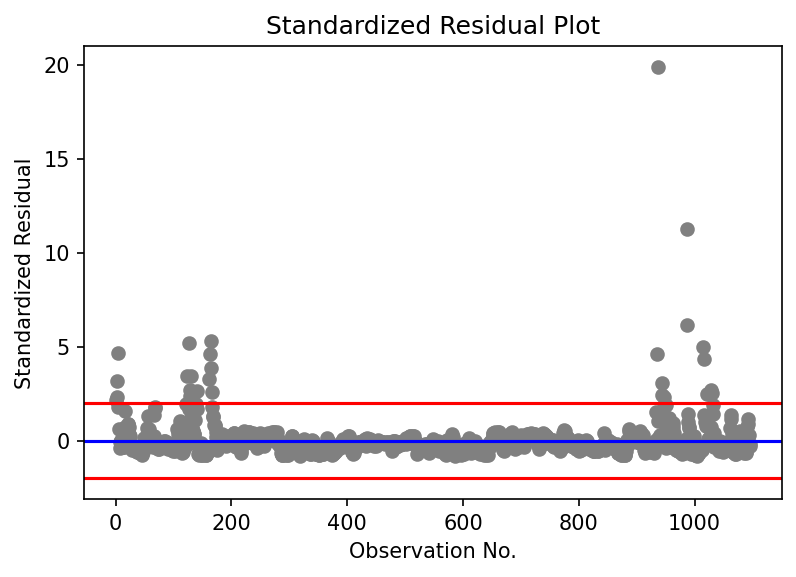

In [17]:
Id1 = data1[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

In [18]:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1     
    # Checking for start of new run 
    for i in range(len(l)): 
        # no. of runs 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
            # print(i, runs)
        # no. of positive values 
        if(l[i]) >= l_median: 
            n1 += 1   
        # no. of negative values 
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

In [19]:
import math
import statistics

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median) 
  
print('p_value for Z-statistic= ', Z_pval)

runs =  159
n1 =  549
n2 =  548
runs_exp =  549.4995442114858
stan_dev =  16.5529246995655
z =  -23.59096965032023
pval_z =  4.771199460866353e-123
p_value for Z-statistic=  4.771199460866353e-123


In [20]:
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

In [21]:
d_w_3 = Durbin_Watson_test(SD)
print(d_w_3)

x_square_sum =  1096.6565029778735
size =  1096
x_d =  [0. 0. 0. ... 0. 0. 0.]
x_d =  [ 0.          0.12971404  0.87474338 ... -0.59582245 -0.50485788
 -0.09409877]
d =  0.8881689541207388
0.8881689541207388


For n = 1100, k = 1, dL = 1.899, dU　= 1.903.  

First order correlation exist!!